<a href="https://colab.research.google.com/github/raghavanpartha/FirstApp/blob/main/CNN_Lung_infection_prediction_raj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# CNN Lung infection predieection by Srinivasa Raghavan P, Coding done on Colab

In [2]:
# Create a Classification model that can predict whether the given image belongs to Healthy lung or type1 or type2 disease

In [3]:
# Extracting the data
! unzip data_Lungs.zip

Archive:  data_Lungs.zip
   creating: data_Lungs/
  inflating: __MACOSX/._data_Lungs   
  inflating: data_Lungs/.DS_Store    
   creating: data_Lungs/test/
  inflating: __MACOSX/data_Lungs/._test  
   creating: data_Lungs/train/
  inflating: __MACOSX/data_Lungs/._train  
   creating: data_Lungs/test/Type 1 disease/
  inflating: __MACOSX/data_Lungs/test/._Type 1 disease  
  inflating: data_Lungs/test/.DS_Store  
   creating: data_Lungs/test/healthy/
  inflating: __MACOSX/data_Lungs/test/._healthy  
   creating: data_Lungs/test/Type 2 disease/
  inflating: __MACOSX/data_Lungs/test/._Type 2 disease  
   creating: data_Lungs/train/Type 1 disease/
  inflating: __MACOSX/data_Lungs/train/._Type 1 disease  
  inflating: data_Lungs/train/.DS_Store  
   creating: data_Lungs/train/healthy/
  inflating: __MACOSX/data_Lungs/train/._healthy  
   creating: data_Lungs/train/Type 2 disease/
  inflating: __MACOSX/data_Lungs/train/._Type 2 disease  
  inflating: data_Lungs/test/Type 1 disease/radiopaedia

In [4]:
import tensorflow as tf

Image sample of Type1 disease lung



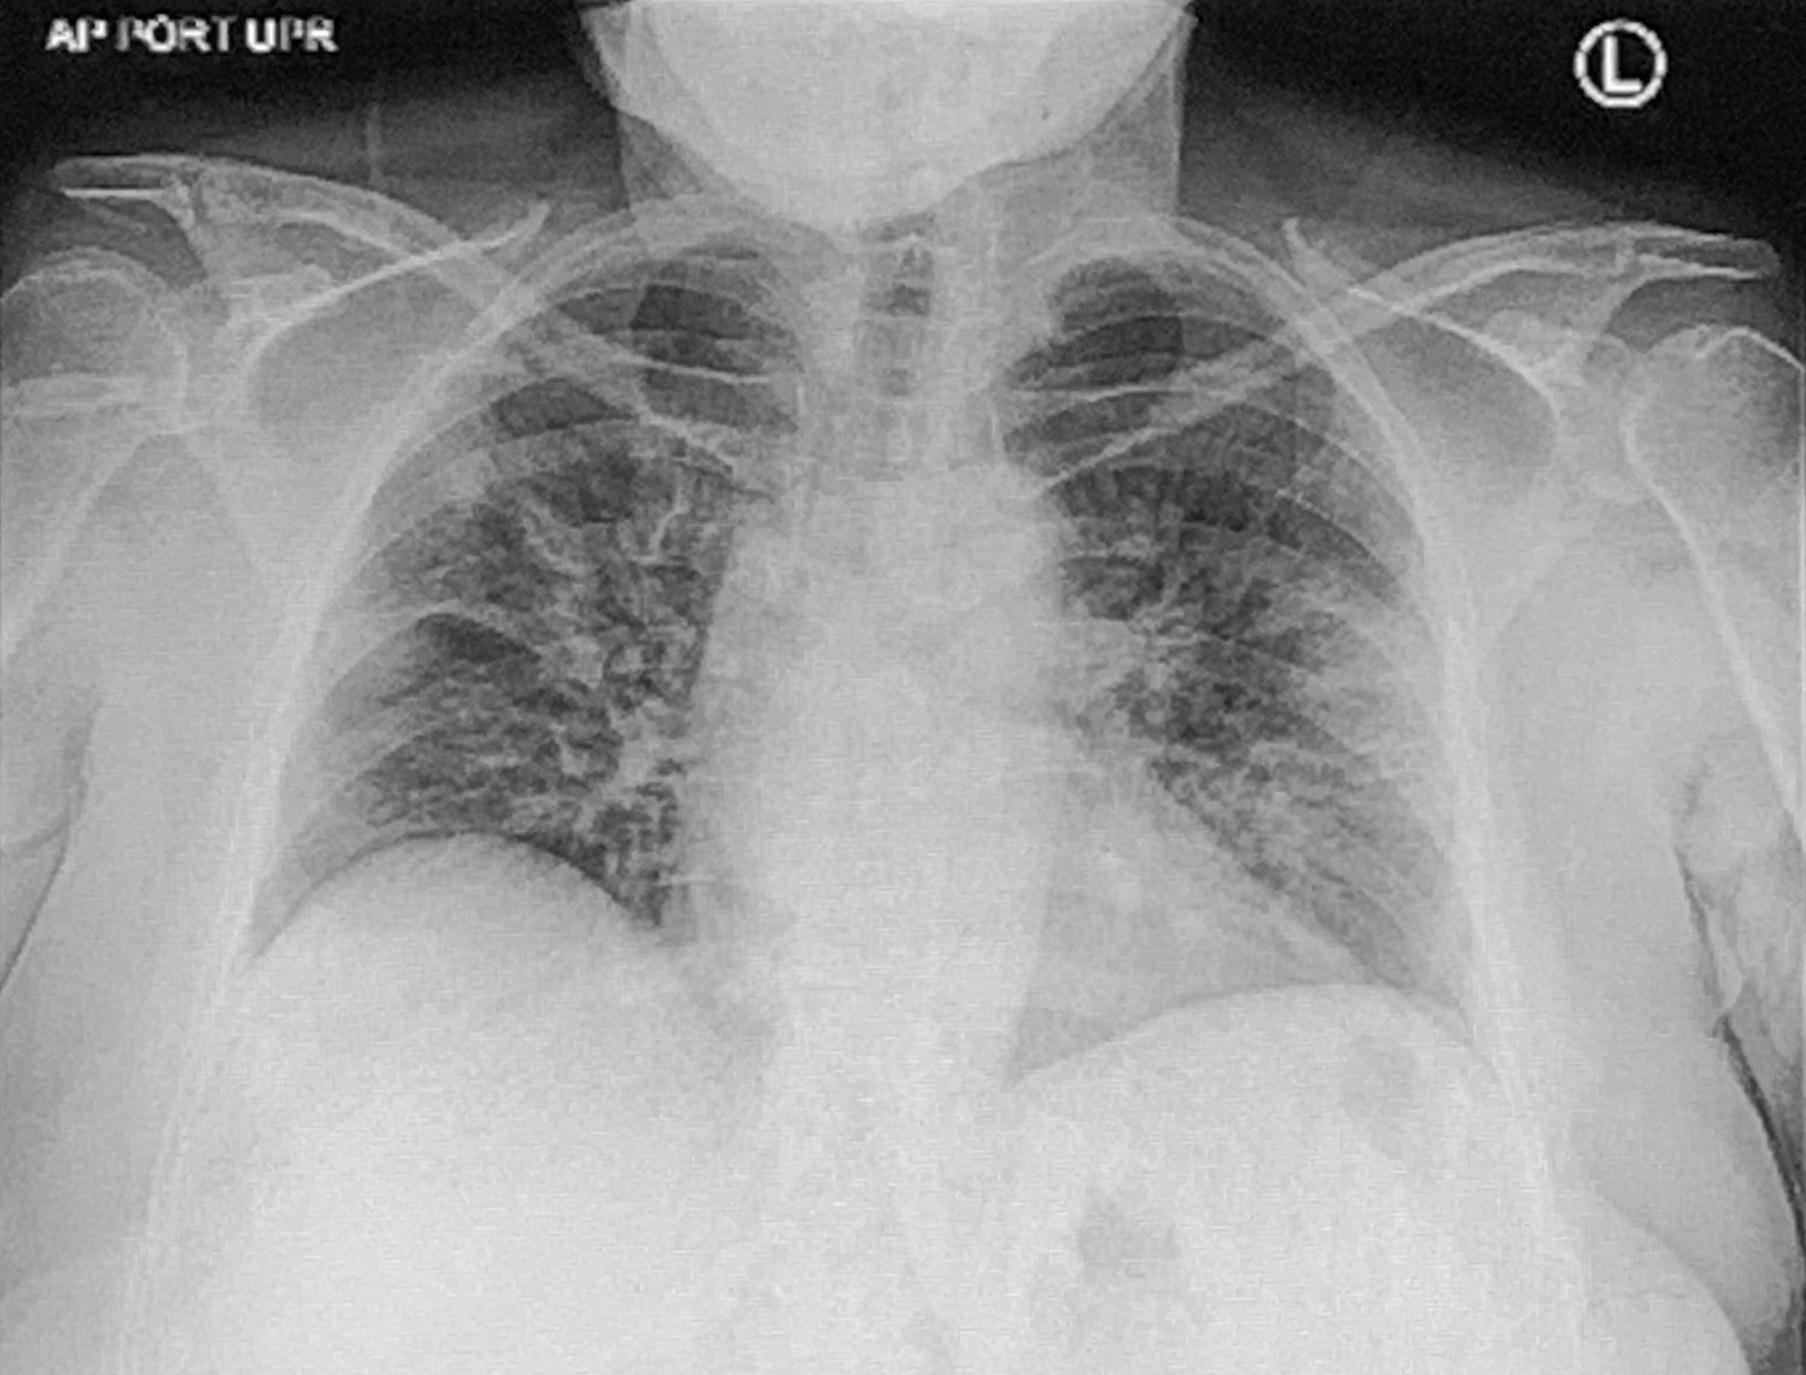

Image sample of Type2 disease lung



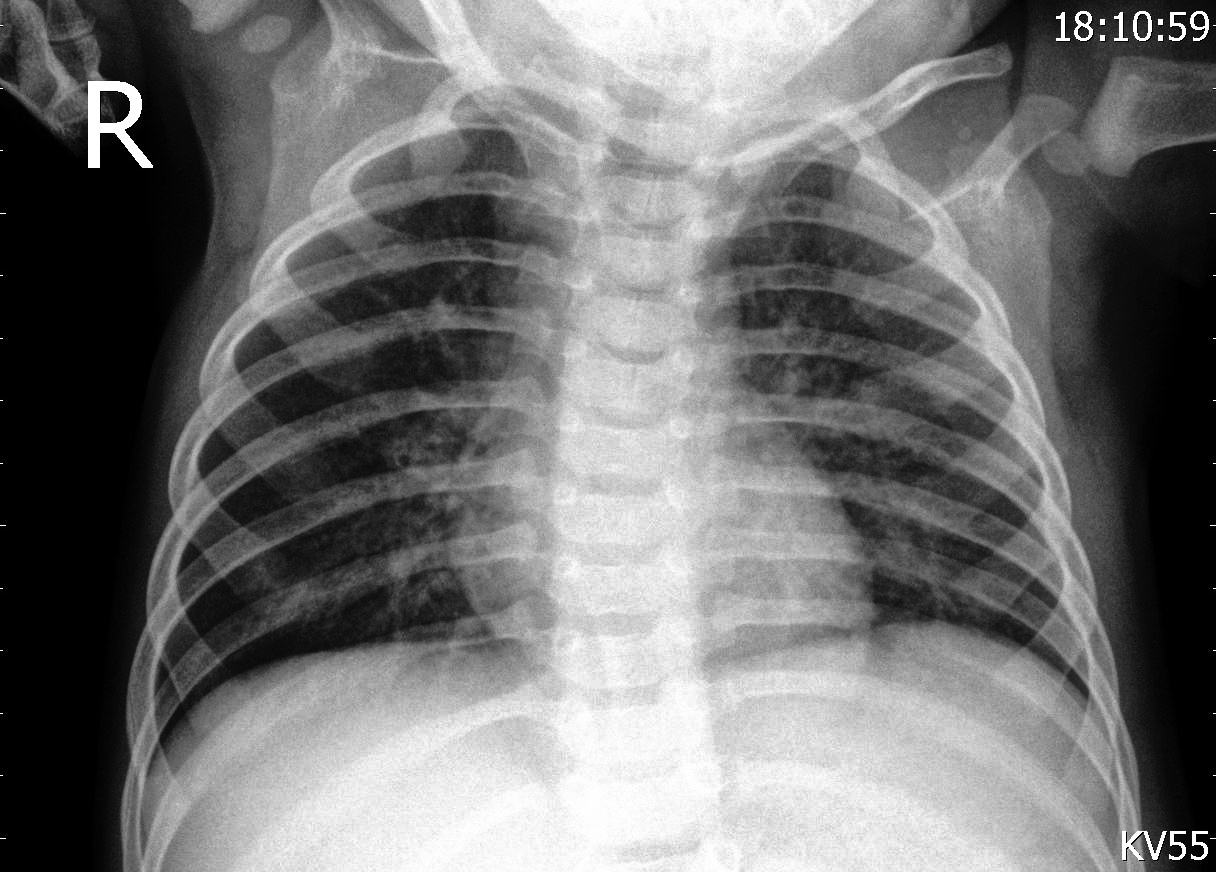

Image sample of Healthy lung



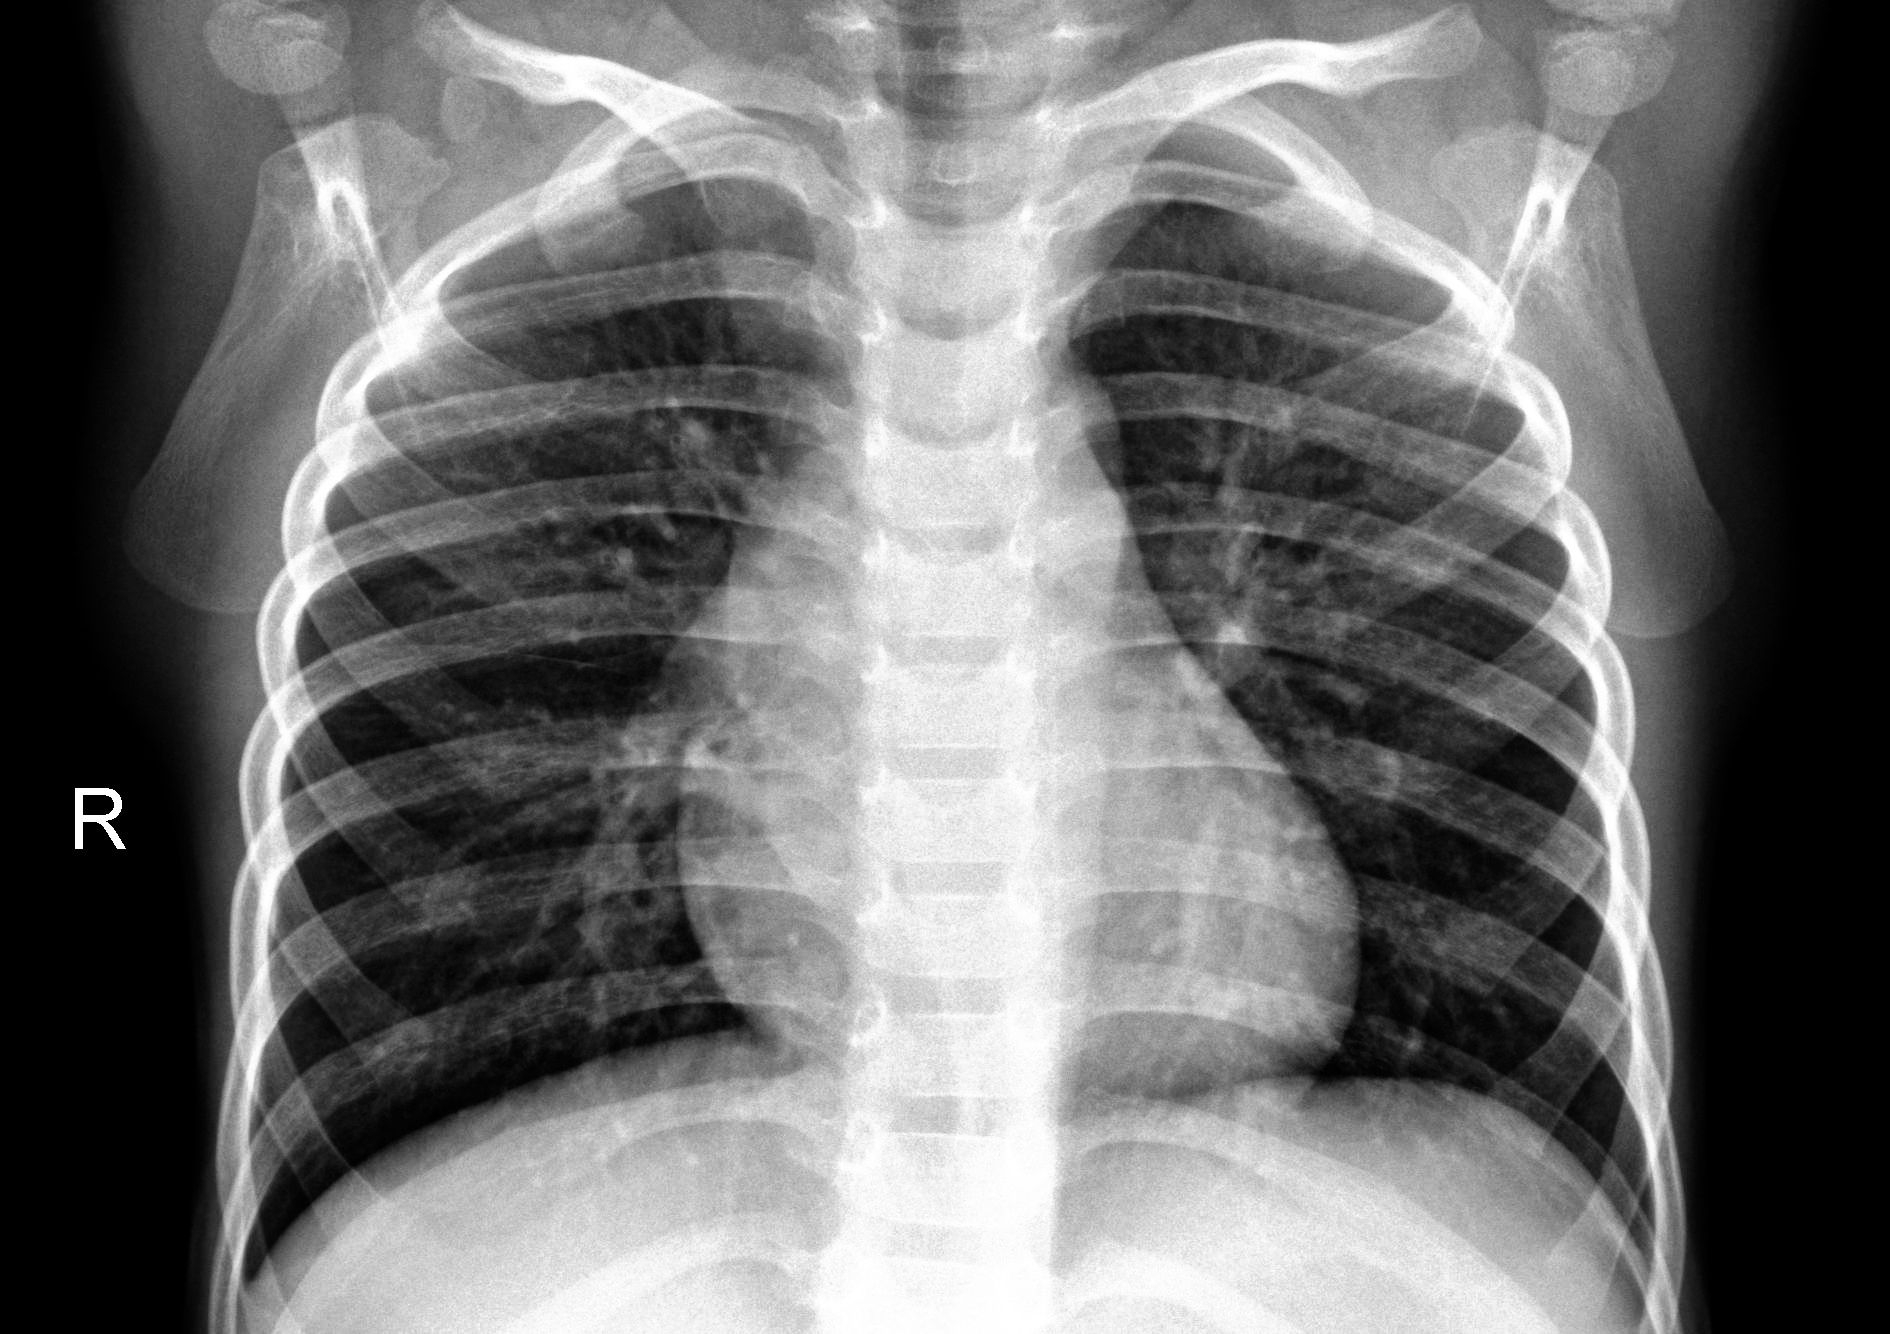

In [5]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
#img = cv2.imread('COVID-00012.jpg')
#cv2_imshow(img)
img_type1 = cv2.imread('data_Lungs/train/Type 1 disease/COVID-00013b.jpg')
img_type2 = cv2.imread('data_Lungs/train/Type 2 disease/084.jpeg')
img_healthy = cv2.imread('data_Lungs/test/healthy/0110.jpeg')
print("Image sample of Type1 disease lung\n")
cv2_imshow(img_type1)
print("Image sample of Type2 disease lung\n")
cv2_imshow(img_type2)
print("Image sample of Healthy lung\n")
cv2_imshow(img_healthy)

In [6]:
#tf.keras.preprocessing.image_dataset_from_directory(
#    directory="data_Lungs/train/",
#    labels="inferred",
#    label_mode="categorical",
#    class_names=None,
#    color_mode="grayscale",
#    batch_size=32,
#    image_size=(48, 48),
#    shuffle=True,
#    seed=None,
#    validation_split=None,
#    subset=None,
#    interpolation="bilinear",
#    follow_links=False,
#    crop_to_aspect_ratio=False
#)

In [7]:
#def to_grayscale_then_rgb(image):
#    image = tf.image.rgb_to_grayscale(image)
#    return image

In [8]:
#Preprocessing --- Goal to make the data compatible for CNN input
# In tensorflow, you can achieve the same using ImageGenerators


#train_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale= 1.0/255, preprocessing_function = to_grayscale_then_rgb)
#test_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale= 1.0/255, preprocessing_function = to_grayscale_then_rgb)


train_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale= 1.0/255.)
test_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale= 1.0/255.)

In [9]:
#Pass the images through the generator

trainImageData = train_generator.flow_from_directory("data_Lungs/train/",
                                                     batch_size=16, #how much images to give per iteration in an epoch
                                                     class_mode="categorical", #Incase of multi-class classification, "categorical"
                                                     target_size=(48,48) #Ensures all images are of same size (resizing)
                                                     ) 

testImageData = test_generator.flow_from_directory("data_Lungs/test/",
                                                     batch_size=16, #how much images to give per iteration in an epoch
                                                     class_mode="categorical", #Incase of multi-class classification, "categorical"
                                                     target_size=(48,48) #Ensures all images are of same size (resizing)
                                                     ) 

Found 251 images belonging to 3 classes.
Found 66 images belonging to 3 classes.


# There are 251 images belonging to 3x classes for Train and 66 images belonging to 3x classes for **Test**

In [10]:
#Given dataset is a balanced dataset !!!

trainImageData.class_indices

{'Type 1 disease': 0, 'Type 2 disease': 1, 'healthy': 2}

In [11]:
#Given dataset is a balanced dataset !!!

testImageData.class_indices

{'Type 1 disease': 0, 'Type 2 disease': 1, 'healthy': 2}

In [12]:
trainImageData.filenames

['Type 1 disease/01.jpeg',
 'Type 1 disease/010.png',
 'Type 1 disease/012.jpeg',
 'Type 1 disease/015.jpg',
 'Type 1 disease/019.png',
 'Type 1 disease/02.jpeg',
 'Type 1 disease/020.jpg',
 'Type 1 disease/021.jpeg',
 'Type 1 disease/022.jpeg',
 'Type 1 disease/024.jpeg',
 'Type 1 disease/025.jpeg',
 'Type 1 disease/026.jpeg',
 'Type 1 disease/027.jpeg',
 'Type 1 disease/03.jpeg',
 'Type 1 disease/031.jpeg',
 'Type 1 disease/032.jpeg',
 'Type 1 disease/033.png',
 'Type 1 disease/039.jpeg',
 'Type 1 disease/04.png',
 'Type 1 disease/040.jpeg',
 'Type 1 disease/041.jpeg',
 'Type 1 disease/042.jpeg',
 'Type 1 disease/043.jpeg',
 'Type 1 disease/044.jpeg',
 'Type 1 disease/045.jpeg',
 'Type 1 disease/046.jpeg',
 'Type 1 disease/047.jpeg',
 'Type 1 disease/048.jpeg',
 'Type 1 disease/049.jpeg',
 'Type 1 disease/050.jpeg',
 'Type 1 disease/051.jpeg',
 'Type 1 disease/052.jpeg',
 'Type 1 disease/053.jpeg',
 'Type 1 disease/054.jpeg',
 'Type 1 disease/055.jpeg',
 'Type 1 disease/056.jpg',
 'T

In [13]:
testImageData.filenames

['Type 1 disease/0100.jpeg',
 'Type 1 disease/0102.jpeg',
 'Type 1 disease/0105.png',
 'Type 1 disease/0106.jpeg',
 'Type 1 disease/0108.jpeg',
 'Type 1 disease/0111.jpg',
 'Type 1 disease/0112.jpg',
 'Type 1 disease/0113.jpg',
 'Type 1 disease/0115.jpeg',
 'Type 1 disease/0118.jpeg',
 'Type 1 disease/0119.jpeg',
 'Type 1 disease/0120.jpg',
 'Type 1 disease/094.png',
 'Type 1 disease/096.png',
 'Type 1 disease/098.jpeg',
 'Type 1 disease/COVID-00003b.jpg',
 'Type 1 disease/COVID-00012.jpg',
 'Type 1 disease/COVID-00022.jpg',
 'Type 1 disease/COVID-00033.jpg',
 'Type 1 disease/COVID-00037.jpg',
 'Type 1 disease/auntminnie-2020_01_31_20_24_2322_2020_01_31_x-ray_coronavirus_US.jpg',
 'Type 1 disease/auntminnie-a-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg',
 'Type 1 disease/auntminnie-b-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg',
 'Type 1 disease/auntminnie-c-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg',
 'Type 1 disease/auntminnie-d-2020_01_28_

In [14]:
trainImageData.image_shape

(48, 48, 3)

In [15]:
testImageData.image_shape

(48, 48, 3)

In [16]:
!pip install opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Build CNN Architecture

In [17]:
# Architect CNN model

model = tf.keras.models.Sequential()

#Convolution Layer
#================================================================================================================================================
#First Convolution Layer

#Conv2D(noFeatureMap, kernelShape, inputShape, activation, padding) Here same means add one pad layer

model.add(tf.keras.layers.Conv2D(32 , (3,3) , input_shape= trainImageData.image_shape , activation= 'relu' , padding='same' )) #Convolve
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2))) #Pooling 

#Second Convolution Layer

#Conv2D(noFeatureMap, kernelShape, inputShape, activation, padding) Here same means add one pad layer

model.add(tf.keras.layers.Conv2D(16 , (3,3), activation= 'relu' , padding='same' )) #Convolve
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2))) #Pooling 

#=================================================================================================================================================
# Flatten

model.add(tf.keras.layers.Flatten())

#=================================================================================================================================================
# ANN
model.add(tf.keras.layers.Dense(units= 4096 , activation="relu"))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(units= 1024, activation="relu"))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(units= 256, activation="relu"))
model.add(tf.keras.layers.Dense(units= 3 , activation="softmax"))
#model.add(tf.keras.layers.Dense(units= 2 , activation="softmax"))

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 16)        4624      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 16)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 2304)              0         
                                                                 
 dense (Dense)               (None, 4096)              9

In [19]:
#Compile

model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy", #For multi-class classification: categorical_crossentropy | sparse_categorical_crossentropy
              metrics=['accuracy'])

In [20]:
len(trainImageData.filenames) // trainImageData.batch_size

15

In [21]:
#Callbacks

# How to stop the training process if my model has converged successfully?
# Convergence Criteria:
# 1. Model must be a generalized model ( testScore > trainScore )
# 2. Model's Test Score >= CL
# Custom Callback which satisfies the above two criteria :)

class MyQualityThreshold(tf.keras.callbacks.Callback):
  def __init__(self,cl):
    super(MyQualityThreshold, self).__init__()
    self.cl = cl
  
  def on_epoch_end(self,epoch,logs=None):
    testScore = logs['val_accuracy']
    trainScore = logs['accuracy']
    #epoch=logs['']

    if (testScore > trainScore or testScore >= self.cl) and epoch > 2:
      self.model.stop_training=True

In [22]:
# Fit the model
# batch_size=32
# model.fit(trainImageData,
#          validation_data=testImageData,
#          epochs=10,
#          steps_per_epoch = len(trainImageData.filenames) // trainImageData.batch_size, #For training
#          validation_steps= len(testImageData.filenames) // testImageData.batch_size) #For testing

In [23]:
# Fit the model - Training the model without augmentation
batch_size=16
history = model.fit(trainImageData,
                    validation_data=testImageData,
                    epochs=10,
                    steps_per_epoch=len(trainImageData.filenames) // trainImageData.batch_size, #For training
                    validation_steps=len(testImageData.filenames) // testImageData.batch_size, #For testing
                    callbacks=[MyQualityThreshold(0.8)])

Epoch 1/10
15/15 [==============================] - 22s 1s/step - loss: 2.9743 - accuracy: 0.4766 - val_loss: 1.2451 - val_accuracy: 0.2500
Epoch 2/10
15/15 [==============================] - 14s 930ms/step - loss: 0.7933 - accuracy: 0.6426 - val_loss: 0.9860 - val_accuracy: 0.5938
Epoch 3/10
15/15 [==============================] - 15s 1s/step - loss: 0.6007 - accuracy: 0.7532 - val_loss: 0.7320 - val_accuracy: 0.6562
Epoch 4/10
15/15 [==============================] - 14s 935ms/step - loss: 0.4719 - accuracy: 0.8213 - val_loss: 0.4802 - val_accuracy: 0.8281


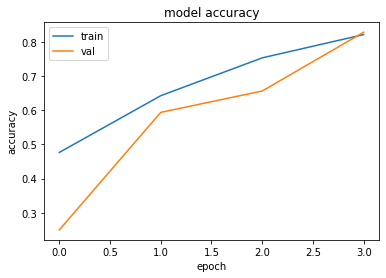

In [24]:
import keras
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

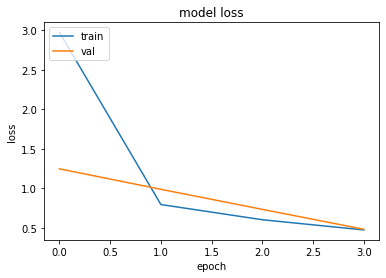

In [25]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [26]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [27]:
#Prediction with a model trained without augmentation
# model
#Load an Image
imageToPredict = tf.keras.preprocessing.image.load_img('COVID-00012.jpg', target_size=(48, 48))
#Step2: Convert image to np array 
myImageNPArray = tf.keras.preprocessing.image.img_to_array(imageToPredict)
# Step3: Make the image compatible for the model by adding n
myCompatibleImage = np.expand_dims(myImageNPArray, axis = 0)
#Step4: Prediction
prediction = model.predict(myCompatibleImage)
print(prediction)

[[1. 0. 0.]]


Inference: Model is able to predict the input correctly belonging to Type1 Disease. 

# Augmentation to training data, based on requirements provided

In [28]:
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1.0/255.,
                                                                  rotation_range=90,
                                                                  zoom_range=0.2,
                                                                  horizontal_flip=True,
                                                                  vertical_flip=True)


In [29]:
#Callbacks

# How to stop the training process if my model has converged successfully?
# Convergence Criteria:
# 1. Model must be a generalized model ( testScore > trainScore )
# 2. Model's Test Score >= CL
# Custom Callback which satisfies the above two criteria :)

class MyQualityThreshold(tf.keras.callbacks.Callback):
  def __init__(self,cl):
    super(MyQualityThreshold, self).__init__()
    self.cl = cl
  
  def on_epoch_end(self,epoch,logs=None):
    testScore = logs['val_accuracy']
    trainScore = logs['accuracy']
    #epoch=logs['']

    if (testScore > trainScore or testScore >= self.cl) and epoch > 2:
      self.model.stop_training=True

In [30]:
# Fit the model after augmentation
batch_size=16
history = model.fit(trainImageData,
                    validation_data=testImageData,
                    epochs=10,
                    steps_per_epoch=len(trainImageData.filenames) // trainImageData.batch_size, #For training
                    validation_steps=len(testImageData.filenames) // testImageData.batch_size, #For testing
                    callbacks=[MyQualityThreshold(0.8)])

Epoch 1/10
15/15 [==============================] - 15s 985ms/step - loss: 0.4259 - accuracy: 0.8596 - val_loss: 2.4256 - val_accuracy: 0.6250
Epoch 2/10
15/15 [==============================] - 15s 983ms/step - loss: 0.3681 - accuracy: 0.8894 - val_loss: 0.3898 - val_accuracy: 0.8750
Epoch 3/10
15/15 [==============================] - 14s 946ms/step - loss: 0.1320 - accuracy: 0.9574 - val_loss: 0.2693 - val_accuracy: 0.8906
Epoch 4/10
15/15 [==============================] - 14s 918ms/step - loss: 0.4651 - accuracy: 0.8894 - val_loss: 0.3054 - val_accuracy: 0.9375


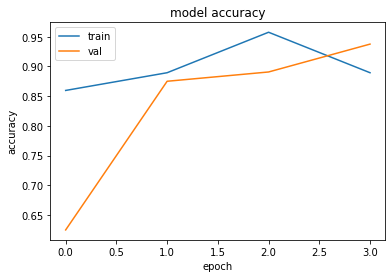

In [31]:
import keras
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

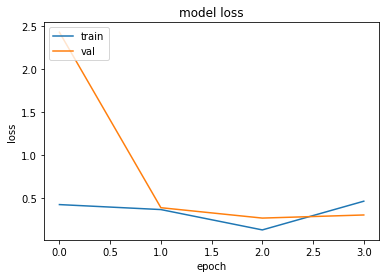

In [32]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [33]:
#Prediction with model trained using augmentation
#Load an Image
imageToPredict = tf.keras.preprocessing.image.load_img('COVID-00012.jpg', target_size=(48, 48))
#Step2: Convert image to np array 
myImageNPArray = tf.keras.preprocessing.image.img_to_array(imageToPredict)
# Step3: Make the image compatible for the model by adding n
myCompatibleImage = np.expand_dims(myImageNPArray, axis = 0)
#Step4: Prediction
prediction = model.predict(myCompatibleImage)
print(prediction)

[[1. 0. 0.]]


Inference: Model w/ augmented training data also able to predict the input test image correctly as Type1 disease. 

In [34]:
#Saving Model
model.save("LungsDiseaseDetector")

INFO:tensorflow:Assets written to: LungsDiseaseDetector/assets


# Transfer learning using the CNN model architected

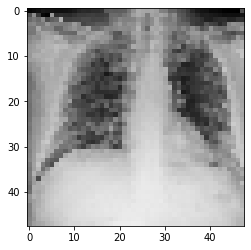

In [35]:
#Deployment Example
#Step1: Load an Image
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

imageToPredict = tf.keras.preprocessing.image.load_img('COVID-00012.jpg', target_size=(48, 48))
plt.imshow(imageToPredict)

In [36]:
#Step2: Convert image to np array 
myImageNPArray = tf.keras.preprocessing.image.img_to_array(imageToPredict)

myImageNPArray.shape

(48, 48, 3)

In [37]:
# Step3: Make the image compatible for the model by adding n
myCompatibleImage = np.expand_dims(myImageNPArray, axis = 0)
myCompatibleImage.shape

(1, 48, 48, 3)

In [38]:
#Step4: Prediction
prediction = model.predict(myCompatibleImage)

In [39]:
prediction

array([[1., 0., 0.]], dtype=float32)

In [40]:
list(trainImageData.class_indices)[np.argmax(prediction)]

'Type 1 disease'

Inference: CNN model able to predict the right disease as Type 1 using RGB Image data training

# Part#2 - Transfer learning using mobile net:

In [41]:
import tensorflow as tf
from glob import glob

In [42]:
# Set the training path and validation path

train_path = 'data_Lungs/train/'
validation_path = 'data_Lungs/test/'

In [43]:
#Initialize Glob to interact with storage

image_files = glob(train_path +'/*/*.jp*g')
valid_image_files = glob(validation_path +'/*/*.jp*g')

In [44]:
#Step1: Create ImageGenerator object (Use Algo's preprocessing function)

gen = tf.keras.preprocessing.image.ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input,
                                                      rotation_range=20,
                                                      shear_range=0.1,
                                                      zoom_range=0.2,
                                                      horizontal_flip=True,
                                                      vertical_flip=True)

gen2 = tf.keras.preprocessing.image.ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input)

In [45]:
#Step2: Create Train and Valid Obj

train_generator = gen.flow_from_directory(train_path,
                                          target_size=[48,48],
                                          class_mode='categorical',
                                          batch_size=16)

valid_generator = gen2.flow_from_directory(validation_path,
                                          target_size=[48,48],
                                          class_mode='categorical',
                                          batch_size=16)

Found 251 images belonging to 3 classes.
Found 66 images belonging to 3 classes.


In [46]:
#Step3: Load the model with Training Enabled ! ---> 
# include_top = False will remove FC layer from existing arch


mobnet = tf.keras.applications.mobilenet.MobileNet(input_shape=[48,48,3],
                                        weights="imagenet",
                                        include_top=False)

#Following Method 1, that will lock weights of CNN layer

for layer in mobnet.layers:
  layer.trainable=False #If Approach 1--- True else False

17235968/17225924 [==============================] - 0s 0us/step


In [47]:
#Step4: Create FC layer

#Flatten

flatten = tf.keras.layers.Flatten()

# You can create your hidden layers here
#hLayer1 = tf.keras.layers.Dense(4000,activation="relu")
#hLayer2 = tf.keras.layers.Dense(4000,activation="relu")
#hLayer3 = tf.keras.layers.Dense(4000,activation="relu")

# Output Layer


finalLayer = tf.keras.layers.Dense(3,activation="softmax")

In [48]:
#Create Final Model

model = tf.keras.models.Sequential([
                                    mobnet,
                                    flatten,
                                    finalLayer
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 1, 1, 1024)       3228864   
 nal)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 1024)              0         
                                                                 
 dense_4 (Dense)             (None, 3)                 3075      
                                                                 
Total params: 3,231,939
Trainable params: 3,075
Non-trainable params: 3,228,864
_________________________________________________________________


In [49]:
mobnet.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 conv1 (Conv2D)              (None, 24, 24, 32)        864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 24, 24, 32)       128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 24, 24, 32)        0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 24, 24, 32)       288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 24, 24, 32)       128       
 ation)                                         

In [50]:
#Compile

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [51]:
# Callbacks Convergence Criteria:
# 1. Model must be a generalized model ( testScore > trainScore )
# 2. Model's Test Score >= CL
# Custom Callback which satisfies the above two criteria :)

class MyQualityThreshold(tf.keras.callbacks.Callback):
  def __init__(self,cl):
    super(MyQualityThreshold, self).__init__()
    self.cl = cl
  
  def on_epoch_end(self,epoch,logs=None):
    testScore = logs['val_accuracy']
    trainScore = logs['accuracy']
    #epoch=logs['']

    if (testScore > trainScore or testScore >= self.cl) and epoch > 2:
      self.model.stop_training=True

In [52]:
#Fit Model 
batch_size=16
history = model.fit(train_generator,
                    validation_data=valid_generator,
                    epochs=10,
                    steps_per_epoch=len(train_generator.filenames) // batch_size,
                    validation_steps=len(valid_generator.filenames) // batch_size,
                    callbacks=[MyQualityThreshold(0.8)])

Epoch 1/10
15/15 [==============================] - 16s 969ms/step - loss: 1.0886 - accuracy: 0.4553 - val_loss: 1.1017 - val_accuracy: 0.4062
Epoch 2/10
15/15 [==============================] - 12s 826ms/step - loss: 1.0810 - accuracy: 0.4298 - val_loss: 1.1021 - val_accuracy: 0.4062
Epoch 3/10
15/15 [==============================] - 12s 836ms/step - loss: 1.0822 - accuracy: 0.4383 - val_loss: 1.0904 - val_accuracy: 0.4062
Epoch 4/10
15/15 [==============================] - 12s 847ms/step - loss: 1.0662 - accuracy: 0.4511 - val_loss: 1.0781 - val_accuracy: 0.4531


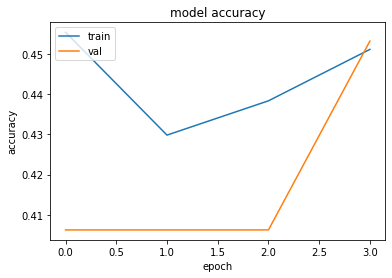

In [53]:
import keras
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

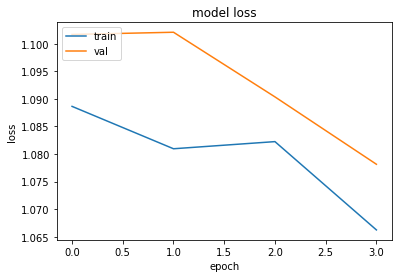

In [54]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [55]:
#Saving Model
model.save("LungsDetectorMobileNet")

INFO:tensorflow:Assets written to: LungsDetectorMobileNet/assets


INFO:tensorflow:Assets written to: LungsDetectorMobileNet/assets


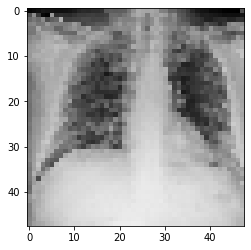

In [56]:
#Step1 - Load an Image
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

imageToPredict = tf.keras.preprocessing.image.load_img('COVID-00012.jpg', target_size=(48, 48))
plt.imshow(imageToPredict)

In [57]:
#Step2: Convert image to np array 
myImageNPArray = tf.keras.preprocessing.image.img_to_array(imageToPredict)
myImageNPArray.shape

(48, 48, 3)

In [58]:
# Step3: Make the image compatible for the model by adding n
myCompatibleImage = np.expand_dims(myImageNPArray, axis = 0)
myCompatibleImage.shape

(1, 48, 48, 3)

In [59]:
#Step4: Prediction
prediction = model.predict(myCompatibleImage)
prediction

array([[0.42153475, 0.3189377 , 0.25952762]], dtype=float32)

In [60]:
list(train_generator.class_indices)[np.argmax(prediction)]

'Type 1 disease'

In [62]:
#Inference: Mobilenet Transfer Learning model also can predict the input image as Type1 disease! 

In [64]:
# Part#3 - Transfer learning using Densenet:

In [65]:
#Step1: Create ImageGenerator object (Use Algo's preprocessing function)

gen = tf.keras.preprocessing.image.ImageDataGenerator(preprocessing_function=tf.keras.applications.densenet.preprocess_input,
                                                      rotation_range=20,
                                                      shear_range=0.1,
                                                      zoom_range=0.2,
                                                      horizontal_flip=True,
                                                      vertical_flip=True)

gen2 = tf.keras.preprocessing.image.ImageDataGenerator(preprocessing_function=tf.keras.applications.densenet.preprocess_input)

In [66]:
#Step2: Create Train and Valid Obj

train_generator = gen.flow_from_directory(train_path,
                                          target_size=[224,224],
                                          class_mode='categorical',
                                          batch_size=7)

valid_generator = gen2.flow_from_directory(validation_path,
                                          target_size=[224,224],
                                          class_mode='categorical',
                                          batch_size=7)

Found 251 images belonging to 3 classes.
Found 66 images belonging to 3 classes.


In [67]:
#Step3: Load the model with Training Enabled ! ---> 
# include_top = False will remove FC layer from existing arch


densnet = tf.keras.applications.densenet.DenseNet121(input_shape=[224,224,3],
                                        weights="imagenet",
                                        include_top=False)

#Following Method 1, that will lock weights of CNN layer

for layer in densnet.layers:
  layer.trainable=False #If Approach 1--- True else False

29097984/29084464 [==============================] - 0s 0us/step


In [68]:
#Step4: Create FC layer

#Flatten

flatten = tf.keras.layers.Flatten()

# You can create your hidden layers here
#hLayer1 = tf.keras.layers.Dense(4000,activation="relu")
#hLayer2 = tf.keras.layers.Dense(4000,activation="relu")
#hLayer3 = tf.keras.layers.Dense(4000,activation="relu")

# Output Layer


finalLayer = tf.keras.layers.Dense(3,activation="softmax")

In [69]:
#Create Final Model

model = tf.keras.models.Sequential([
                                    densnet,
                                    flatten,
                                    finalLayer
])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet121 (Functional)    (None, 7, 7, 1024)        7037504   
                                                                 
 flatten_2 (Flatten)         (None, 50176)             0         
                                                                 
 dense_5 (Dense)             (None, 3)                 150531    
                                                                 
Total params: 7,188,035
Trainable params: 150,531
Non-trainable params: 7,037,504
_________________________________________________________________


In [70]:
densnet.summary()

Model: "densenet121"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0          ['input_2[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 112, 112, 64  9408        ['zero_padding2d[0][0]']         
                                )                                                                 
                                                                                        

In [71]:
#Compile

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [72]:
# Callbacks Convergence Criteria:
# 1. Model must be a generalized model ( testScore > trainScore )
# 2. Model's Test Score >= CL
# Custom Callback which satisfies the above two criteria :)

class MyQualityThreshold(tf.keras.callbacks.Callback):
  def __init__(self,cl):
    super(MyQualityThreshold, self).__init__()
    self.cl = cl
  
  def on_epoch_end(self,epoch,logs=None):
    testScore = logs['val_accuracy']
    trainScore = logs['accuracy']
    #epoch=logs['']

    if (testScore > trainScore or testScore >= self.cl) and epoch > 2:
      self.model.stop_training=True

In [73]:
#Fit Model 
batch_size=7
history = model.fit(train_generator,
                    validation_data=valid_generator,
                    epochs=15,
                    steps_per_epoch=len(train_generator.filenames) // batch_size,
                    validation_steps=len(valid_generator.filenames) // batch_size,
                    callbacks=[MyQualityThreshold(0.8)])

Epoch 1/15
35/35 [==============================] - 65s 2s/step - loss: 4.4439 - accuracy: 0.7049 - val_loss: 2.6492 - val_accuracy: 0.6508
Epoch 2/15
35/35 [==============================] - 57s 2s/step - loss: 1.3063 - accuracy: 0.8484 - val_loss: 0.6748 - val_accuracy: 0.8889
Epoch 3/15
35/35 [==============================] - 56s 2s/step - loss: 1.1623 - accuracy: 0.9016 - val_loss: 1.9246 - val_accuracy: 0.7778
Epoch 4/15
35/35 [==============================] - 55s 2s/step - loss: 1.6061 - accuracy: 0.8197 - val_loss: 0.6789 - val_accuracy: 0.8889


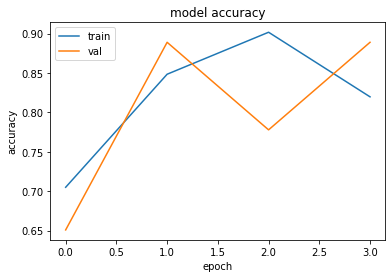

In [74]:
import keras
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

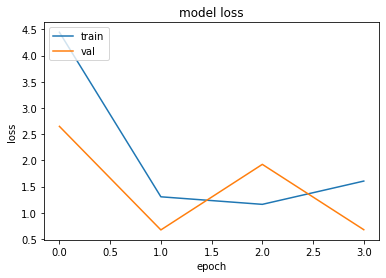

In [75]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [76]:
#Saving Model
model.save("LungsDetectorDenseNet")

INFO:tensorflow:Assets written to: LungsDetectorDenseNet/assets


INFO:tensorflow:Assets written to: LungsDetectorDenseNet/assets


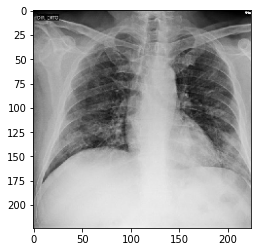

In [77]:
#Step1 - Load an Image
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

imageToPredict = tf.keras.preprocessing.image.load_img('COVID-00012.jpg', target_size=(224, 224))
plt.imshow(imageToPredict)

In [78]:
#Step2: Convert image to np array 
myImageNPArray = tf.keras.preprocessing.image.img_to_array(imageToPredict)
myImageNPArray.shape

(224, 224, 3)

In [79]:
# Step3: Make the image compatible for the model by adding n
myCompatibleImage = np.expand_dims(myImageNPArray, axis = 0)
myCompatibleImage.shape

(1, 224, 224, 3)

In [80]:
#Step4: Prediction
prediction = model.predict(myCompatibleImage)
prediction

array([[1., 0., 0.]], dtype=float32)

In [81]:
list(train_generator.class_indices)[np.argmax(prediction)]

'Type 1 disease'

Inference: Able to predict the input image as right classification of disease Type1